In [26]:
# Importing libraries

from PIL import Image
import numpy as np
import cv2 as cv
import pytesseract
import matplotlib.pyplot as plt
image_file = "Resources/rc5.jpeg"
img = cv.imread(image_file)


## Display Function

In [2]:
# display function for image

def display(im_path):
    dpi = 300
    im_data = plt.imread(im_path)

    height, width  = im_data.shape[:2]
    
    figsize = width / float(dpi), height / float(dpi)

    fig = plt.figure(figsize=figsize)
    ax = fig.add_axes([0, 0, 2, 2])

    ax.axis('off')

    name = ax.imshow(im_data, cmap='gray')

    plt.show(name)

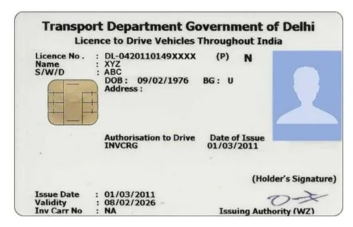

In [3]:
dpi_img = display(image_file)

## 1. Normalization

In [ ]:
norm_conf = []

In [249]:
image_file = "rc1.jpg"
img = cv.imread(image_file)
gray_image = grayscale(img)
cv.imwrite("gray.jpeg", gray_image)

norm_img = np.zeros((img.shape[0], img.shape[1]))
img = cv.normalize(img, norm_img, 0, 255, cv.NORM_MINMAX)

ocr_res = pytesseract.image_to_string(img, lang='hin+eng', config='--psm 6')
df = pytesseract.image_to_data(img, lang='hin+eng', config='--psm 6', output_type='data.frame')
norm = df[df['conf']>-1]['conf'].mean()
print(norm)

48.24638625


In [138]:
norm_conf.append(norm)
norm_conf

[48.24638625, 48.932871541666664, 62.248955484375, 27.314638342105265]

In [139]:
norm_mean = sum(norm_conf)/len(norm_conf)
print(norm_mean)

46.685712904536736


## 2. Skewness

In [44]:
skew_data = []

In [35]:
def deskew(image):

    co_ords = np.column_stack(np.where(image > 0))

    angle = cv.minAreaRect(co_ords)[-1]

    if angle < -45:

        angle = -(90 + angle)

    else:

        angle = -angle

    (h, w) = image.shape[:2]

    center = (w // 2, h // 2)

    M = cv.getRotationMatrix2D(center, angle, 1.0)

    rotated = cv.warpAffine(image, M, (w, h), flags=cv.INTER_CUBIC,

    borderMode=cv.BORDER_REPLICATE)

    return rotated

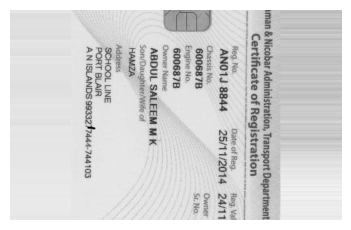

In [247]:
image_file = "rc1.jpg"
img = cv.imread(image_file)
gray_image = grayscale(img)
cv.imwrite("gray.jpeg", gray_image)

# deskewed = cv.imread(deskew(gray_image))
cv.imwrite("deskewes_img.jpg", deskew(gray_image))
display("deskewes_img.jpg")

In [248]:
deskewed = cv.imread("deskewes_img.jpg")

# importing ocr result

ocr_res = pytesseract.image_to_string(deskewed, lang='hin+eng', config='--psm 6')
df = pytesseract.image_to_data(deskewed, lang='hin+eng', config='--psm 6', output_type='data.frame')
skew =df[df['conf']>-1]['conf'].mean()
print(skew)

35.837046433333335


In [63]:
skew_data.append(skew)
skew_data

[33.55084735714286, 42.982851600000004, 48.04145121978023, 33.55084735714286]

In [65]:
skew_mean = sum(skew_data)/len(skew_data)
print(skew_mean)

39.53149938351649


## 3. Gray Scale

In [4]:
gray_data = []

In [27]:
# connverting image from rgb to bw

def grayscale(image):
    return cv.cvtColor(image, cv.COLOR_BGR2GRAY)

In [28]:
gray_image = grayscale(img)
cv.imwrite("gray.jpeg", gray_image)

# importing ocr result

ocr_res = pytesseract.image_to_string(gray_image, lang='hin+eng', config='--psm 6')
df = pytesseract.image_to_data(gray_image, lang='hin+eng', config='--psm 6', output_type='data.frame')
gray_mean = df[df['conf']>-1]['conf'].mean()
print(gray_mean)

61.49049262903226


In [31]:
print(ocr_res)

ail Department Government of Delhi
Licence to Drive Vehicles Throughout India |
Licence ०... :. 00-04207074990000.. (0.
Name ४ XYZ
S/w/D ४ ABC
DOB: 09/02/7976 BG: ७
al Address :
i
ral
GE
Authorisation to Drive Date of Issue
INVCRG 04/03/207 |
(Holder's Signature) |
Issue Date: 04/03/203 oe
Validity ५ 08/02/2026 Oa |
\\ InvCarrNo : NA ————_—_—_—_ Issuing Authority(wz) »/



In [7]:
gray_data.append(gray_mean)
gray_data

[61.49049262903226]

In [108]:
gray_m = sum(gray_data)/len(gray_data)
print(gray_m)

39.42296514377335


## 4. Thinning and Skeletonization

### Thin/Eroded

In [86]:
thin_data = []

In [87]:
# Thinning and skeletonisation
def thin_font(image):
    import numpy as np
    image = cv.bitwise_not(image)
    kernel = np.ones((2,2),np.uint8)
    image = cv.erode(image, kernel, iterations=1)
    image = cv.bitwise_not(image)
    return (image)

In [245]:
image_file = "rc1.jpg"
img = cv.imread(image_file)
gray_image = grayscale(img)
cv.imwrite("gray.jpeg", gray_image)

eroded_image = thin_font(gray_image)
cv.imwrite("eroded_image.jpg", eroded_image)

df = pytesseract.image_to_data(eroded_image, lang='hin+eng', config='--psm 6', output_type='data.frame')
thin = df[df['conf']>-1]['conf'].mean()
print(thin)

51.64606209677419


In [111]:
thin_data.append(thin)
thin_data

[51.64606209677419, 40.56975363043478, 55.51682313924049, 33.24255537037037]

In [113]:
thin_mean = sum(thin_data)/len(thin_data)
print(thin_mean)

45.24379855920496


### Thick/Dilated

In [126]:
thick_data = []

In [127]:
# THICK/ Dilated
def thick_font(image):
    import numpy as np
    image = cv.bitwise_not(image)
    kernel = np.ones((2,2),np.uint8)
    image = cv.dilate(image, kernel, iterations=1)
    image = cv.bitwise_not(image)
    return (image)

In [244]:
image_file = "rc1.jpg"
img = cv.imread(image_file)
gray_image = grayscale(img)
cv.imwrite("gray.jpeg", gray_image)

dilated_image = thick_font(gray_image)
cv.imwrite("dilated_image.jpg", dilated_image)

df = pytesseract.image_to_data(eroded_image, lang='hin+eng', config='--psm 6', output_type='data.frame')
thick = df[df['conf']>-1]['conf'].mean()
print(thick)

33.24255537037037


In [149]:
thick_data.append(thick)
thick_data

[33.24255537037037, 33.24255537037037, 33.24255537037037, 33.24255537037037]

In [150]:
thick_mean = sum(thick_data)/len(thick_data)
print(thick_mean)

33.24255537037037


## 5. Noise Removal

In [152]:
noise_data = []

In [151]:
# function to remove noise from image

def noise_removal(image):
    import numpy as np
    kernel = np.ones((1, 1), np.uint8)
    image = cv.dilate(image, kernel, iterations=1)
    kernel = np.ones((1, 1), np.uint8)
    image = cv.erode(image, kernel, iterations=1)
    image = cv.morphologyEx(image, cv.MORPH_CLOSE, kernel)
    image = cv.medianBlur(image, 3)
    return (image)

In [311]:
image_file = "rc1.jpg"
img = cv.imread(image_file)
gray_image = grayscale(img)
cv.imwrite("gray.jpeg", gray_image)

no_noise = noise_removal(gray_image)
cv.imwrite("no_noise.jpeg", no_noise)

ocr_res = pytesseract.image_to_string(no_noise, lang='hin+eng', config='--psm 6')
df = pytesseract.image_to_data(no_noise, lang='hin+eng', config='--psm 6', output_type='data.frame')
noise = df[df['conf']>-1]['conf'].mean()
print(noise)

53.179264253968256


In [172]:
noise_data.append(noise)
noise_data

[53.179264253968256, 38.259836121212125, 50.7222774264706, 33.87891843902439]

In [173]:
noise_mean = sum(noise_data)/len(noise_data)
print(noise_mean)

44.01007406016885


## 6. Thresholding and Binarisation

In [233]:
thresh_data = []

In [240]:
image_file = "rc4.jpg"
img = cv.imread(image_file)
gray_image = grayscale(img)
cv.imwrite("gray.jpeg", gray_image)
sharpen_kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
sharpen = cv.filter2D(gray_image, -1, sharpen_kernel)
thresh = cv.threshold(gray_image, 0, 255, cv.THRESH_BINARY_INV + cv.THRESH_OTSU)[1]
ocr_res = pytesseract.image_to_string(thresh, lang='hin+eng', config='--psm 6')
df = pytesseract.image_to_data(thresh, lang='hin+eng', config='--psm 6', output_type='data.frame')
thresh = df[df['conf']>-1]['conf'].mean()
print(thresh)

29.092162653846156


In [241]:
thresh_data.append(thresh)
thresh_data

[53.75891287692308, 46.388115666666664, 52.25328837179487, 29.092162653846156]

In [242]:
thresh_mean = sum(thresh_data)/len(thresh_data)
print(thresh_mean)

45.37311989230769


## 7. Image Scaling

### Checking the DPI of an Image

In [12]:
from PIL import Image

# Open an image file
with Image.open("Resources/rc6.jpg") as img:
    # Get the DPI information
    dpi = img.info.get("dpi")

    if dpi is not None:
        dpi_x, dpi_y = dpi
        print(f"DPI (X, Y): {dpi_x}, {dpi_y}")
    else:
        print("DPI information not available.")

DPI information not available.


### Converting the DPI of an Image

In [18]:
from PIL import Image

# Open an image file
with Image.open("Resources/rc5.jpeg") as img:
    # Specify the new DPI
    new_dpi = (300, 300)  # For example, 300 DPI in both x and y directions

    # Modify the DPI
    img.save("Resources/rc5_300.jpeg", dpi=new_dpi)

    print(f"DPI changed to {new_dpi}")


DPI changed to (300, 300)


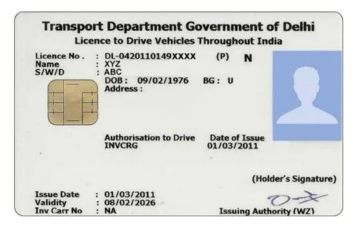

In [20]:
display('Resources/rc5_300.jpeg')

In [274]:
dpi_data = []

In [29]:
image_file = "rc1_300.jpg"
img = cv.imread(image_file)
gray_image = grayscale(img)
cv.imwrite("gray.jpeg", gray_image)

# importing ocr result

ocr_res = pytesseract.image_to_string(gray_image, lang='hin+eng', config='--psm 6')
df = pytesseract.image_to_data(gray_image, lang='hin+eng', config='--psm 6', output_type='data.frame')
dpi = df[df['conf']>-1]['conf'].mean()
print(dpi)

error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:196: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


In [30]:
print(ocr_res)

ail Department Government of Delhi
Licence to Drive Vehicles Throughout India |
Licence ०... :. 00-04207074990000.. (0.
Name ४ XYZ
S/w/D ४ ABC
DOB: 09/02/7976 BG: ७
al Address :
i
ral
GE
Authorisation to Drive Date of Issue
INVCRG 04/03/207 |
(Holder's Signature) |
Issue Date: 04/03/203 oe
Validity ५ 08/02/2026 Oa |
\\ InvCarrNo : NA ————_—_—_—_ Issuing Authority(wz) »/



In [282]:
dpi_data.append(dpi)
dpi_data

[61.658507953125, 53.1475413125, 54.01056452054794, 32.877901]

In [283]:
dpi_mean = sum(dpi_data)/len(dpi_data)
print(dpi_mean)

50.42362869654324


# Other Important Observations

In [298]:
inv_data = []

In [305]:
# creating Inverted Image

image_file = "rc4.jpg"
img = cv.imread(image_file)
inverted_img = cv.bitwise_not(img)
cv.imwrite("inverted.jpeg", inverted_img)

ocr_res = pytesseract.image_to_string(inverted_img, lang='hin+eng', config='--psm 6')
df = pytesseract.image_to_data(inverted_img, lang='hin+eng', config='--psm 6', output_type='data.frame')
dpi = df[df['conf']>-1]['conf'].mean()
print(dpi)

30.256901710526318


In [306]:
inv_data.append(dpi)
inv_data

[51.16315422580645, 48.96520181632653, 59.47859104615385, 30.256901710526318]

In [308]:
inv_mean = sum(inv_data)/len(inv_data)
print(inv_mean)

47.465962199703284


In [343]:
data = []

In [349]:
# gray + ostu + binary_inv + noise

image_file = "rc2_300.jpg"
img = cv.imread(image_file)

# gray_image = grayscale(img)
# cv.imwrite("gray.jpeg", gray_image)

inverted_img = cv.bitwise_not(img)
cv.imwrite("inverted.jpeg", inverted_img)

no_noise = noise_removal(inverted_img)
cv.imwrite("no_noise.jpeg", no_noise)

ocr_res = pytesseract.image_to_string(no_noise, lang='hin+eng', config='--psm 6')
df = pytesseract.image_to_data(no_noise, lang='hin+eng', config='--psm 6', output_type='data.frame')
noise = df[df['conf']>-1]['conf'].mean()

# sharpen_kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
# sharpen = cv.filter2D(no_noise, -1, sharpen_kernel)
# thresh = cv.threshold(no_noise, 0, 255, cv.THRESH_BINARY_INV + cv.THRESH_OTSU)[1]
# ocr_res = pytesseract.image_to_string(thresh, lang='hin+eng', config='--psm 6')
# df = pytesseract.image_to_data(thresh, lang='hin+eng', config='--psm 6', output_type='data.frame')
# thresh = df[df['conf']>-1]['conf'].mean()
print(noise)

36.41938111111111


In [350]:
data.append(noise)
data

[43.66906626923076, 36.41938111111111]

In [351]:
m = sum(data)/len(data)
print(m)

40.04422369017094


## Data extraction

In [1]:
# using re to extract data 

import re
def extract_issue_date(text):
    pattern = r"Issue Date\s*=\s*(\d{1,2}/\d{1,2}/\d{2,4})"
    match = re.search(pattern, text)
    if match:
        return match.group(1).strip()
    else:
        print('not found')
        return None
issue_date= extract_issue_date(ocr_res)

NameError: name 'ocr_res' is not defined

In [70]:
def extract_validity(text):
    pattern = r"Validity\s*\+\s*(\d{2}/\d{2}/\d{4})"
    match = re.search(pattern, text)
    if match:
        return match.group(1).strip()
    else:
        print("cda")
        return None
validity = extract_validity(ocr_res)

cda


In [71]:
import re

def extract_name(text):
    pattern = r"Name\s*:\s*([A-Z\s]+)\n"
    match = re.search(pattern, text)
    if match:
        return match.group(1).strip()
    else:
        return None
name = extract_name(ocr_res)

In [72]:
def extract_license_number(text):
    pattern = r"Licence No\s*:\s*([A-Z0-9-]+)\s*\("
    match = re.search(pattern, text)
    if match:
        return match.group(1).strip()
    else:
        return None
liscence_no = extract_license_number(ocr_res)

In [89]:
def extract_relation(text):
    pattern = r"S/W/D\s*:\s*(.*)"
    match = re.search(pattern, text)
    if match:
        return match.group(1).strip()
    else:
        return None
swd = extract_relation(ocr_res)

In [90]:
# using cascade classifer for image extraction

face_cascade = cv.CascadeClassifier(cv.data.haarcascades + 'haarcascade_frontalface_default.xml') # this xml gives the haarcascde funcitions
gray_image = cv.cvtColor(img, cv.COLOR_BGR2GRAY) # converting the image into bw
faces = face_cascade.detectMultiScale(gray_image, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30)) # auto adjusting the size of image for pixels
if len(faces) > 0:
    x, y, w, h = faces[0] # after detecting saving the coordinates of file
    person_image = img[y:y+h, x:x+w]
    cv.imwrite("per.jpg", person_image)
    print("Person's photo extracted successfully!")
else:
    print("No face detected in the image.")

Person's photo extracted successfully!


In [91]:
per_image = "per.jpg"
img = cv.imread(per_image)

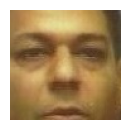

In [92]:
display(per_image)

## Storing the data

In [93]:
data = {"Issue_date":issue_date,"Validity": validity,"Name": name,"SWD": swd,"Liscence_no": liscence_no, "image":person_image}